---
# <center> Лабораторна робота №5 </center>
## __Тема. Алгоритми пошуку__
## __Мета:__ Засвоїти варіанти реалізації алгоритмів пошуку засобами Python і 
методи оцінювання їх складності
---

# <center> Хід роботи </center>

# 1) Оцінити асимптотичну складність алгоритму лінійного пошуку в О-нотації.


In [1]:
def linear_search(arr, target):
    """
    Лінійний пошук елемента в списку.
    
    :param arr: Список, в якому шукаємо.
    :param target: Елемент, який шукаємо.
    :return: Індекс елемента, якщо знайдено, інакше -1.
    """
    for i in range(len(arr)):  # Перебір усіх елементів
        if arr[i] == target:  # Якщо елемент знайдено
            return i
    return -1  # Елемент не знайдено знайдено.")


# Оцінка асимптотичної складності алгоритму лінійного пошуку

## Аналіз складності:

- ### Найгірший випадок:
Шуканого елемента немає в списку, або він останній. Алгоритм переглядає всі $n$ елементів.
Часова складність: $O(n)$
Просторова складність: $O(1)$ (не потребує додаткової пам'яті).

- ## Середній випадок:
Шуканий елемент знаходиться десь посередині.
Часова складність: $O\left(\frac{n}{2}\right)$, але в асимптотичному аналізі $O(n)$.

- ## Найкращий випадок:
Шуканий елемент — перший.

Часова складність: $O(1)$.
Таким чином, в асимптотичному аналізі лінійний пошук має часову складність $O(n)$.

# 2) Oцінити асимптотичну складність алгоритму бінарного пошуку в О-нотації.

In [9]:
def binary_search(arr, target):
    """
    Бінарний пошук елемента у впорядкованому списку.
    
    :param arr: Впорядкований список, у якому шукаємо.
    :param target: Елемент, який шукаємо.
    :return: Індекс елемента, якщо знайдено, інакше -1.
    """
    left, right = 0, len(arr) - 1
    
    while left <= right:
        mid = (left + right) // 2  # Середній індекс
        if arr[mid] == target:  # Елемент знайдено
            return mid
        elif arr[mid] < target:  # Шуканий елемент правіше
            left = mid + 1
        else:  # Шуканий елемент лівіше
            right = mid - 1
    
    return -1  # Елемент не знайдено

# Оцінка асимптотичної складності алгоритму бінарного пошуку

## Аналіз складності:
- ## Найгірший випадок:
На кожній ітерації алгоритм ділить список навпіл, тому кількість перевірок відповідає висоті дерева рішень.
Часова складність: $O(\log n)$
Просторова складність: $O(1)$ (ітеративна версія, без рекурсії).

- ## Середній випадок:
Середня кількість ітерацій така ж, як і для найгіршого випадку, оскільки кожна ітерація зменшує розмір проблеми експоненційно.
Часова складність: $O(\log n)$.

- ## Найкращий випадок:
Шуканий елемент — середній елемент.
Часова складність: $O(1)$.

# 3) Написати функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції linear_searh();

In [14]:
import pandas as pd
import time
import random

def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

def measure_linear_search_performance(max_n, step, target):
    """
    Створює датафрейм з розмірами масивів та часом виконання linear_search().

    :param max_n: Максимальний розмір масиву.
    :param step: Крок збільшення розміру масиву.
    :param target: Елемент, який шукається (останній у масиві для найгіршого випадку).
    :return: DataFrame з колонками ['n', 'time'].
    """
    results = []

    for n in range(step, max_n + 1, step):
        arr = list(range(n))  # Створення масиву [0, 1, 2, ..., n-1]

        start_time = time.time()  # Початок вимірювання часу
        linear_search(arr, target)
        elapsed_time = time.time() - start_time  # Час виконання

        results.append({"n": n, "time": elapsed_time})

    return pd.DataFrame(results)

# Використання функції
max_n = 10000  # Максимальний розмір масиву
step = 1000  # Крок збільшення розміру масиву
target = -1  # Елемент, який не існує у масиві (найгірший випадок)

df = measure_linear_search_performance(max_n, step, target)
print(df)  # Виведення результату


       n      time
0   1000  0.000000
1   2000  0.000000
2   3000  0.000000
3   4000  0.001001
4   5000  0.002000
5   6000  0.000000
6   7000  0.000000
7   8000  0.001000
8   9000  0.001001
9  10000  0.000998


## 4) − написати функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції bin_searh()

In [17]:
import pandas as pd
import time
import random

def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

def measure_linear_search_performance(max_n, step, target):
    """
    Створює датафрейм з розмірами масивів та часом виконання linear_search().

    :param max_n: Максимальний розмір масиву.
    :param step: Крок збільшення розміру масиву.
    :param target: Елемент, який шукається (останній у масиві для найгіршого випадку).
    :return: DataFrame з колонками ['n', 'time'].
    """
    results = []

    for n in range(step, max_n + 1, step):
        arr = list(range(n))  # Створення масиву [0, 1, 2, ..., n-1]

        start_time = time.time()  # Початок вимірювання часу
        linear_search(arr, target)
        elapsed_time = time.time() - start_time  # Час виконання

        results.append({"n": n, "time": elapsed_time})

    return pd.DataFrame(results)

def measure_binary_search_performance(max_n, step, target):
    """
    Створює датафрейм з розмірами масивів та часом виконання binary_search().

    :param max_n: Максимальний розмір масиву.
    :param step: Крок збільшення розміру масиву.
    :param target: Елемент, який шукається.
    :return: DataFrame з колонками ['n', 'time'].
    """
    results = []

    for n in range(step, max_n + 1, step):
        arr = list(range(n))  # Створення впорядкованого масиву [0, 1, 2, ..., n-1]

        start_time = time.time()  # Початок вимірювання часу
        binary_search(arr, target)
        elapsed_time = time.time() - start_time  # Час виконання

        results.append({"n": n, "time": elapsed_time})

    return pd.DataFrame(results)

# Використання функцій
max_n = 10000  # Максимальний розмір масиву
step = 1000  # Крок збільшення розміру масиву
target = -1  # Елемент, який не існує у масиві (найгірший випадок)

df_linear = measure_linear_search_performance(max_n, step, target)
df_binary = measure_binary_search_performance(max_n, step, target)

print("Linear Search Performance:\n", df_linear)
print("\nBinary Search Performance:\n", df_binary)


Linear Search Performance:
        n      time
0   1000  0.000000
1   2000  0.000000
2   3000  0.000000
3   4000  0.000000
4   5000  0.000998
5   6000  0.001000
6   7000  0.000998
7   8000  0.001001
8   9000  0.001004
9  10000  0.000529

Binary Search Performance:
        n  time
0   1000   0.0
1   2000   0.0
2   3000   0.0
3   4000   0.0
4   5000   0.0
5   6000   0.0
6   7000   0.0
7   8000   0.0
8   9000   0.0
9  10000   0.0


## 5) За результатами попередніх завдань побудувати графіки залежності часу виконання процедури пошуку від розміру масиву.


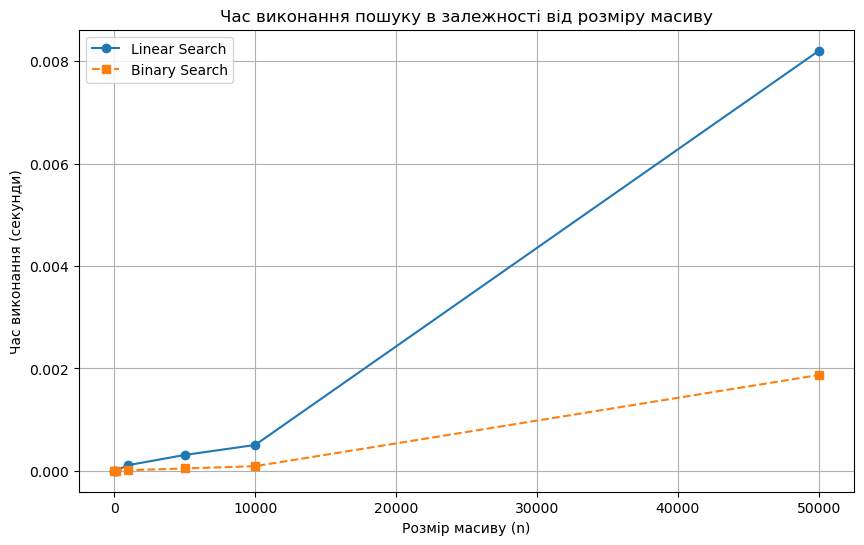

In [58]:
import pandas as pd
import timeit
import random
import matplotlib.pyplot as plt

# Функція лінійного пошуку

def linear_search(arr, target):
    for index, value in enumerate(arr):
        if value == target:
            return index
    return -1

# Функція бінарного пошуку

def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# Вимірювання часу для лінійного пошуку

def measure_linear_search():
    results = []
    array_sizes = [10, 100, 1000, 5000, 10000, 50000]

    for size in array_sizes:
        array = list(range(size))
        target = random.randint(0, size - 1)

        elapsed_time = timeit.timeit(
            stmt=f"linear_search({array}, {target})",
            setup="from __main__ import linear_search",
            number=10
        )

        results.append({"n": size, "time": elapsed_time / 10})

    return pd.DataFrame(results)

# Вимірювання часу для бінарного пошуку

def measure_binary_search():
    results = []
    array_sizes = [10, 100, 1000, 5000, 10000, 50000]

    for size in array_sizes:
        array = list(range(size))
        target = random.randint(0, size - 1)

        elapsed_time = timeit.timeit(
            stmt=f"binary_search({array}, {target})",
            setup="from __main__ import binary_search",
            number=10
        )

        results.append({"n": size, "time": elapsed_time / 10})

    return pd.DataFrame(results)

# Виконання вимірювань

df_linear = measure_linear_search()
df_binary = measure_binary_search()

# Побудова графіків

plt.figure(figsize=(10, 6))
plt.plot(df_linear['n'], df_linear['time'], label='Linear Search', marker='o', linestyle='-')
plt.plot(df_binary['n'], df_binary['time'], label='Binary Search', marker='s', linestyle='--')

plt.title('Час виконання пошуку в залежності від розміру масиву')
plt.xlabel('Розмір масиву (n)')
plt.ylabel('Час виконання (секунди)')
plt.legend()
plt.grid(True)
plt.show()


# 6) Оцінити, який з двох алгоритмів є ефективнішим і в якому діапазоні розміру задачі.

З графіків, побудованих раніше, можна побачити, що лінійний пошук зростає пропорційно розміру масиву, а бінарний пошук — набагато повільніше. На малих розмірах масивів час виконання обох алгоритмів може бути схожим, але на великих масивах бінарний пошук стане значно ефективнішим

# <center> Контрольні питання </center>

# Постановка задачі пошуку

## Опис задачі  
Дано масив чисел $A = [a_1, a_2, \dots, a_n]$, де $n$ — кількість елементів. Необхідно:  
- Знайти індекс елемента $x$, який задовольняє умову $A[i] = x$.  
- Якщо елемент $x$ у масиві відсутній, повернути значення $-1$.  

---

## Вхідні дані  
1. Масив $A$, який може бути:  
   - **Не відсортованим** — для виконання лінійного пошуку.  
   - **Відсортованим за зростанням** — для виконання бінарного пошуку.  
2. Шуканий елемент $x$, який потрібно знайти.  

---

## Вихідні дані  
- Індекс елемента $x$ у масиві $A$, якщо такий елемент існує.  
- Значення $-1$, якщо елемент $x$ відсутній у масиві.  

---

## Умови та обмеження  
- $n > 0$ — масив містить хоча б один елемент.  
- Масив може містити дублікати, проте алгоритм повертає індекс першого знайденого елемента.  


# Які критерії можна використовувати для оцінювання ефективності алгоритмів пошуку?

# Оцінка алгоритмів пошуку

## Часова складність
### Лінійний пошук
- Складність: $O(n)$  
- Типи оцінки:  
  - Найгірший випадок  
  - Середній випадок  
  - Найкращий випадок  

### Бінарний пошук
- Складність: $O(\log n)$  
- Типи оцінки:  
  - Найгірший випадок  
  - Середній випадок  
  - Найкращий випадок  

## Просторова складність
- **Лінійний пошук**: $O(1)$  
- **Бінарний пошук**: $O(1)$  

## Інші характеристики
1. **Стабільність**  
   - Знаходить перший відповідний елемент.  
2. **Сумісність із типами даних**  
   - Лінійний: універсальний.  
   - Бінарний: лише для відсортованих даних.  
3. **Простота реалізації**  
   - Лінійний: простий.  
   - Бінарний: складніший (рекурсія).  
4. **Практична швидкість**  
   - Залежить від розміру масиву.  
5. **Гнучкість**  
   - Лінійний: динамічні структури.  
   - Бінарний: статичні структури.  


# Що таке лінійний пошук і яка його асимптотична складність?

## Визначення
Лінійний пошук — це базовий алгоритм, що здійснює послідовну перевірку кожного елемента масиву, доки не буде знайдено шуканий елемент $x$ або не завершиться перегляд усіх елементів.  

---

## Як працює алгоритм?
1. Почати перевірку з першого елемента масиву.  
2. Для кожного елемента:  
   - Порівняти його значення із шуканим $x$.  
   - Якщо знайдено, повернути індекс.  
3. Якщо всі елементи перевірено й шуканого $x$ немає, повернути $-1$.  

---

## Приклад роботи
Масив: $A = [5, 3, 8, 6]$, шуканий елемент: $x = 8$.  
- Перевірка елементів:  
  - $5 \neq 8$ — перейти до наступного.  
  - $3 \neq 8$ — продовжити перевірку.  
  - $8 = 8$ — елемент знайдено, повертаємо індекс (2).  

---

## Оцінка складності

### Часова складність
- **Найкращий випадок**: $O(1)$ — елемент знаходиться на першій позиції.  
- **Середній випадок**: $O(n/2) \approx O(n)$ — перевірено половину елементів.  
- **Найгірший випадок**: $O(n)$ — елемент у кінці масиву або відсутній.  

### Просторова складність
- $O(1)$ — використовується лише одна додаткова змінна для індексу.  

---

## Переваги та недоліки

### Переваги
1. Простота реалізації.  
2. Працює з невідсортованими масивами.  

### Недоліки
1. Низька ефективність для великих масивів.  


# Що таке бінарний пошук і в чому полягає його головний принцип роботи?

## Опис алгоритму

### Визначення
Бінарний (двійковий) пошук — це ефективний алгоритм пошуку, що працює лише з **відсортованими масивами**. Основна ідея полягає у поступовому звуженні діапазону пошуку шляхом поділу масиву на дві частини.  

---

### Головний принцип роботи
1. Вибрати середній елемент масиву та порівняти його із шуканим значенням $x$.  
2. Якщо $x = \text{середній елемент}$, повернути його індекс.  
3. Якщо $x < \text{середній елемент}$, повторити пошук у лівій половині масиву.  
4. Якщо $x > \text{середній елемент}$, продовжити пошук у правій половині масиву.  
5. Завершити пошук, коли діапазон стане порожнім (елемент не знайдено).  

---

## Ефективність алгоритму

### Часова складність
- **Найкращий випадок**: $O(1)$ — шуканий елемент одразу знаходиться в центрі.  
- **Середній та найгірший випадок**: $O(\log n)$ — кількість кроків зростає логарифмічно зі збільшенням розміру масиву.  

---

## Перевага алгоритму
Бінарний пошук забезпечує високу швидкість на великих масивах завдяки зменшенню діапазону пошуку вдвічі на кожній ітерації.  


# Порівняння бінарного та лінійного пошуку

## Переваги та недоліки алгоритмів

### Бінарний пошук

#### Переваги:
1. **Висока швидкість:** Часова складність $O(\log n)$ забезпечує швидкий пошук навіть у великих відсортованих масивах.  
2. **Ефективність для великих даних:** Значно перевершує лінійний пошук за продуктивністю на великих наборах даних.  

#### Недоліки:
1. **Необхідність сортування:** Масив має бути попередньо відсортований, що може займати $O(n \log n)$ часу.  
2. **Складність реалізації:** Важчий для програмування й розуміння, особливо для початківців.  
3. **Обмеження на тип даних:** Не працює зі змінними або несортованими структурами.  

---

### Лінійний пошук

#### Переваги:
1. **Простота:** Легкий для реалізації та зрозумілий навіть для новачків.  
2. **Універсальність:** Працює з несортованими масивами та потоками даних.  

#### Недоліки:
1. **Низька продуктивність:** Часова складність $O(n)$ робить алгоритм повільним на великих наборах даних.  


# Які існують інші алгоритми пошуку, окрім лінійного та бінарного?

## Основні види алгоритмів

1. **Індексований пошук**  
   - Використовує індексацію елементів, наприклад, через хеш-таблиці.  
   - Часова складність: $O(1)$ у середньому випадку.  

2. **Пошук у дереві**  
   - Застосовується у бінарних деревах пошуку (BST), AVL-деревах, червоно-чорних деревах.  
   - Часова складність: $O(\log n)$ для збалансованих дерев.  

3. **Хеш-пошук**  
   - Оснований на використанні хеш-таблиць для швидкого доступу до елементів.  
   - Часова складність: $O(1)$ у середньому випадку.  

4. **Алгоритми пошуку в графах**  
   - **Пошук у глибину (DFS)** та **пошук у ширину (BFS)** застосовуються в графових структурах і сітках.  
   - Часова складність: $O(V + E)$, де $V$ — кількість вершин, $E$ — кількість ребер.  

5. **Пошук у інтервальних деревах**  
   - Використовується для знаходження елементів у заданих діапазонах чи відрізках.  
   - Часова складність: $O(\log n)$.  

6. **Пошук у двійковому дереві відсічень**  
   - Застосовується для операцій із відсортованими даними, наприклад, "менше або рівно", "більше або рівно".  
   - Часова складність: залежить від розміру дерева, часто $O(\log n)$.  
